In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
G=ox.graph_from_point((40.726047, -73.982417),distance=2000,network_type='drive')

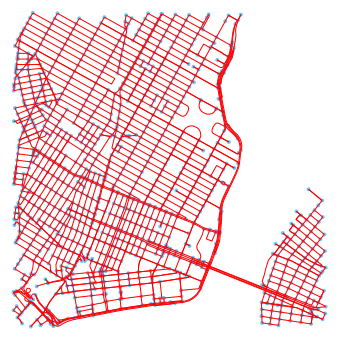

(<Figure size 567.552x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd84f3c8>)

In [3]:
#Mapping all the roads of downtown Manhattan

ox.plot_graph(G,edge_color='red')

In [4]:
edge_cc = nx.closeness_centrality(nx.line_graph(G))

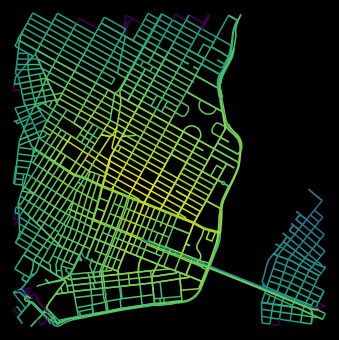

In [15]:
#Mapping the closeness centrality (eg : how close each place is from the central point)

nx.set_edge_attributes(G,edge_cc,'cc') 
ev = list(nx.get_edge_attributes(G,'cc').values())
norm = colors.Normalize(vmin=min(ev)*0.6, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
ec = [cmap.to_rgba(cl) for cl in ev]
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0, node_color='w', 
                        node_edgecolor='black', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)
map1 = (fig, ax)

In [6]:
edge_bc = nx.betweenness_centrality(nx.line_graph(G))

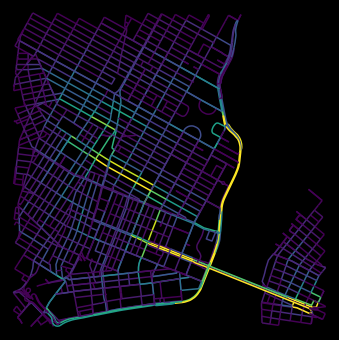

In [16]:
#Mapping the betweenness centrality (eg : what are the most likely used roads thanks to their connexions to the network)

nx.set_edge_attributes(G,edge_bc,'bc') 
ev1 = list(nx.get_edge_attributes(G,'bc').values())
norm1 = colors.Normalize(vmin=min(ev1)*0.6, vmax=max(ev1))
cmap1 = cm.ScalarMappable(norm=norm1, cmap=cm.inferno)
ec1 = [cmap.to_rgba(cl1) for cl1 in ev1]
fig, ax2 = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0, node_color='w', 
                        node_edgecolor='black', node_zorder=2,
                        edge_color=ec1, edge_linewidth=1.5, edge_alpha=1)
map2 = (fig, ax2)

In [12]:
edge_dc = nx.degree_centrality(nx.line_graph(G))